In [34]:
import torch
import h5py
import matplotlib.pyplot as plt
from artist import ARTIST_ROOT
from artist.scenario import Scenario
from artist.raytracing.heliostat_tracing import HeliostatRayTracer

In [35]:
with h5py.File(f'{ARTIST_ROOT}/scenarios/tutorial_scenario.h5', 'r') as f:
    example_scenario = Scenario.load_scenario_from_hdf5(scenario_file=f)

[2024-05-22 09:33:53,276][artist.scenario][INFO] - Loading an ARTIST scenario HDF5 file. This scenario file is version 1.0.
[2024-05-22 09:33:53,277][artist.field.receiver_field][INFO] - Loading a receiver field from an HDF5 file.
[2024-05-22 09:33:53,277][artist.field.receiver][INFO] - Loading receiver1 from an HDF5 file.
[2024-05-22 09:33:53,279][artist.field.receiver][WARNING] - No curvature in the east direction set for the receiver!
[2024-05-22 09:33:53,279][artist.field.receiver][WARNING] - No curvature in the up direction set for the receiver!
[2024-05-22 09:33:53,280][artist.scene.light_source_array][INFO] - Loading a light source array from an HDF5 file.
[2024-05-22 09:33:53,280][artist.scene.sun][INFO] - Loading sun1 from an HDF5 file.
[2024-05-22 09:33:53,282][artist.scene.sun][INFO] - Initializing a sun modeled with a multivariate normal distribution.
[2024-05-22 09:33:53,287][artist.scenario][WARNING] - No kinematic prototype initial_kinematic_orientation_offset_n set.Usin

In [36]:
example_scenario

ARTIST Scenario containing:
	Receivers: 1, 	Light Sources: 1,	 Heliostats: 1

In [37]:
single_heliostat = example_scenario.heliostats.heliostat_list[0]

In [38]:
single_heliostat.position

tensor([0., 5., 0., 1.])

In [39]:
single_heliostat.aim_point

tensor([  0., -50.,   0.,   1.])

In [41]:
light_from_south = torch.tensor([0.0, -1.0, 0.0, 0.0])

In [42]:
single_heliostat.set_aligned_surface(incident_ray_direction=light_from_south)

In [70]:
single_heliostat.current_aligned_surface_normals[0,0:5,:]

tensor([[-0.0043,  1.0000,  0.0049,  0.0000],
        [-0.0044,  1.0000,  0.0049,  0.0000],
        [-0.0044,  1.0000,  0.0049,  0.0000],
        [-0.0045,  1.0000,  0.0048,  0.0000],
        [-0.0046,  1.0000,  0.0047,  0.0000]], grad_fn=<SliceBackward0>)

In [44]:
single_heliostat.set_preferred_reflection_direction(
        rays=-light_from_south)

In [45]:
single_heliostat.preferred_reflection_direction.shape

torch.Size([4, 10000, 4])

In [46]:
single_heliostat.preferred_reflection_direction[0,0:10,:]

tensor([[ 0.0086, -0.9999, -0.0098, -0.0000],
        [ 0.0087, -0.9999, -0.0098, -0.0000],
        [ 0.0089, -0.9999, -0.0098, -0.0000],
        [ 0.0090, -0.9999, -0.0097, -0.0000],
        [ 0.0093, -0.9999, -0.0095, -0.0000],
        [ 0.0099, -0.9999, -0.0086, -0.0000],
        [ 0.0038, -0.9998, -0.0185,  0.0000],
        [ 0.0087, -0.9999, -0.0109,  0.0000],
        [ 0.0091, -0.9999, -0.0101,  0.0000],
        [ 0.0091, -0.9999, -0.0097,  0.0000]], grad_fn=<SliceBackward0>)

In [47]:
raytracer = HeliostatRayTracer(
        scenario=example_scenario,batch_size=10
    )

In [48]:
# Perform heliostat-based raytracing.
image_from_south = raytracer.trace_rays()

In [49]:
image_from_south = raytracer.normalize_bitmap(image_from_south)

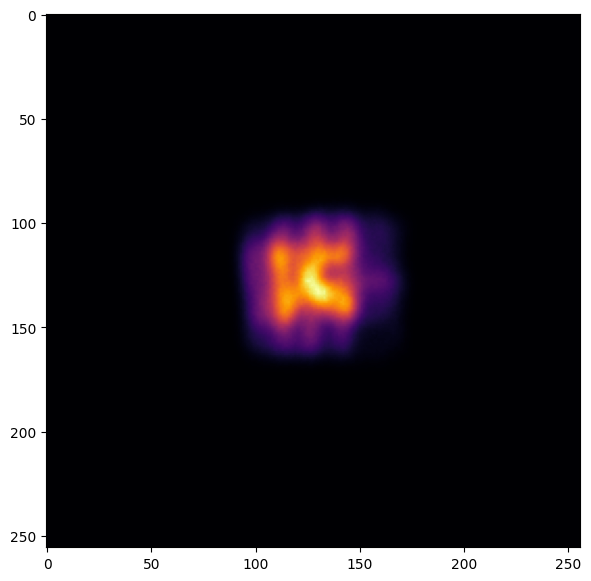

In [68]:
from matplotlib.pyplot import tight_layout

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(image_from_south.T.detach().numpy(), cmap='inferno')
tight_layout()